# Importing Required Library

In [1]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sqlalchemy import create_engine

In [2]:
# Load dataset
base_path = r"E:\DSA\data"
broadband_speeds = pd.read_csv(rf"{base_path}\broadband_speeds_data.csv",nrows=500)
crime_data = pd.read_csv(rf"{base_path}\crime_data.csv",nrows=500)
education_data = pd.read_csv(rf"{base_path}\education_data.csv",nrows=500)
house_prices_no_label = pd.read_csv(rf"{base_path}\house_prices_data.csv",nrows=500)
house_prices_no_label

def assign_label_to_house(df):
    column_name = ["ID","Price","Date","Postcode","Type","New","Duration","PANN","SANON","Street","Locality","Town","District","Country","Product_Category","Product_Status"]
    df.columns = column_name
    return df

house_prices_data = assign_label_to_house(house_prices_no_label)
house_prices_data


,ID,Price,Date,Postcode,Type,New,Duration,PANN,SANON,Street,Locality,Town,District,Country,Product_Category,Product_Status
0,{09266DDC-2AF5-AF90-E063-4704A8C02087},213500,2023-04-28 00:00,NE33 5EJ,D,N,F,5,NaN,ELDON STREET,NaN,SOUTH SHIELDS,SOUTH TYNESIDE,TYNE AND WEAR,A,A
1,{09266DDC-2AF6-AF90-E063-4704A8C02087},385000,2023-09-12 00:00,NE38 8FH,D,N,F,26,NaN,EDALE CLOSE,NaN,WASHINGTON,SUNDERLAND,TYNE AND WEAR,A,A
2,{09266DDC-2AF8-AF90-E063-4704A8C02087},240000,2023-09-01 00:00,NE31 1RH,D,N,F,111,NaN,ST ALOYSIUS VIEW,NaN,HEBBURN,SOUTH TYNESIDE,TYNE AND WEAR,A,A
3,{09266DDC-2AF9-AF90-E063-4704A8C02087},212000,2023-09-26 00:00,NE9 7SL,S,N,F,KIMBERLEY,NaN,STAFFORD VILLAS,NaN,GATESHEAD,SUNDERLAND,TYNE AND WEAR,A,A
4,{09266DDC-2AFB-AF90-E063-4704A8C02087},475000,2023-09-08 00:00,SR6 7XH,D,N,F,16,NaN,SUNNISIDE LEIGH,CLEADON,SUNDERLAND,SOUTH TYNESIDE,TYNE AND WEAR,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,{06C9F487-2560-9388-E063-4804A8C0BD98},440000,2023-07-14 00:00,RG18 3BU,S,N,F,10,NaN,CALARD DRIVE,NaN,THATCHAM,WEST BERKSHIRE,WEST BERKSHIRE,A,A
496,{06C9F487-2561-9388-E063-4804A8C0BD98},1570000,2023-07-21 00:00,OX13 5DT,D,N,F,THE HOUSE ON THE SQUARE,NaN,THE SQUARE,LONGWORTH,ABINGDON,VALE OF WHITE HORSE,OXFORDSHIRE,A,A
497,{06C9F487-2562-9388-E063-4804A8C0BD98},720000,2023-07-20 00:00,SL4 2PL,D,N,F,2,NaN,CHURCH ROAD,OLD WINDSOR,WINDSOR,WINDSOR AND MAIDENHEAD,WINDSOR AND MAIDENHEAD,A,A
498,{06C9F487-2563-9388-E063-4804A8C0BD98},363000,2023-09-06 00:00,RG30 4XN,S,N,F,5,NaN,CHICHESTER ROAD,TILEHURST,READING,READING,READING,A,A


## Data Overview

In [3]:
house_prices_data

,ID,Price,Date,Postcode,Type,New,Duration,PANN,SANON,Street,Locality,Town,District,Country,Product_Category,Product_Status
0,{09266DDC-2AF5-AF90-E063-4704A8C02087},213500,2023-04-28 00:00,NE33 5EJ,D,N,F,5,NaN,ELDON STREET,NaN,SOUTH SHIELDS,SOUTH TYNESIDE,TYNE AND WEAR,A,A
1,{09266DDC-2AF6-AF90-E063-4704A8C02087},385000,2023-09-12 00:00,NE38 8FH,D,N,F,26,NaN,EDALE CLOSE,NaN,WASHINGTON,SUNDERLAND,TYNE AND WEAR,A,A
2,{09266DDC-2AF8-AF90-E063-4704A8C02087},240000,2023-09-01 00:00,NE31 1RH,D,N,F,111,NaN,ST ALOYSIUS VIEW,NaN,HEBBURN,SOUTH TYNESIDE,TYNE AND WEAR,A,A
3,{09266DDC-2AF9-AF90-E063-4704A8C02087},212000,2023-09-26 00:00,NE9 7SL,S,N,F,KIMBERLEY,NaN,STAFFORD VILLAS,NaN,GATESHEAD,SUNDERLAND,TYNE AND WEAR,A,A
4,{09266DDC-2AFB-AF90-E063-4704A8C02087},475000,2023-09-08 00:00,SR6 7XH,D,N,F,16,NaN,SUNNISIDE LEIGH,CLEADON,SUNDERLAND,SOUTH TYNESIDE,TYNE AND WEAR,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,{06C9F487-2560-9388-E063-4804A8C0BD98},440000,2023-07-14 00:00,RG18 3BU,S,N,F,10,NaN,CALARD DRIVE,NaN,THATCHAM,WEST BERKSHIRE,WEST BERKSHIRE,A,A
496,{06C9F487-2561-9388-E063-4804A8C0BD98},1570000,2023-07-21 00:00,OX13 5DT,D,N,F,THE HOUSE ON THE SQUARE,NaN,THE SQUARE,LONGWORTH,ABINGDON,VALE OF WHITE HORSE,OXFORDSHIRE,A,A
497,{06C9F487-2562-9388-E063-4804A8C0BD98},720000,2023-07-20 00:00,SL4 2PL,D,N,F,2,NaN,CHURCH ROAD,OLD WINDSOR,WINDSOR,WINDSOR AND MAIDENHEAD,WINDSOR AND MAIDENHEAD,A,A
498,{06C9F487-2563-9388-E063-4804A8C0BD98},363000,2023-09-06 00:00,RG30 4XN,S,N,F,5,NaN,CHICHESTER ROAD,TILEHURST,READING,READING,READING,A,A


In [4]:
broadband_speeds

,postcode,postcode_space,postcode area,Median download speed (Mbit/s),Average download speed (Mbit/s),Minimum download speed (Mbit/s),Maximum download speed (Mbit/s),Average download speed (Mbit/s) for lines < 10Mbit/s,Average download speed (Mbit/s) for lines 10<30Mbit/s,Average download speed (Mbit/s) for SFBB lines,...,Number of connections 5<10 Mbit/s (number of lines),Number of connections 10<30 Mbit/s (number of lines),Number of connections 30<300 Mbit/s (number of lines),Number of connections >= 300 Mbit/s (number of lines),Number of connections >= 30 Mbit/s (number of lines),Average data usage (GB) for lines < 10Mbit/s,Average data usage (GB) for Basic BB lines,Average data usage (GB) for SFBB lines,Average data usage (GB) for UFBB lines,Average data usage (GB)
0,AB101AU,AB10 1AU,AB,15.6,17.4,8.1,72.2,8.7,15.9,72.2,...,NaN,20.0,NaN,NaN,NaN,202.0,196.0,172.0,NaN,196
1,AB101BA,AB10 1BA,AB,19.7,18.8,7.8,23.8,8.7,19.8,NaN,...,NaN,20.0,NaN,NaN,NaN,31.0,202.0,NaN,NaN,182
2,AB101BB,AB10 1BB,AB,13.9,17.3,4.7,69.1,6.5,16.0,69.1,...,NaN,7.0,NaN,NaN,NaN,90.0,78.0,258.0,NaN,97
3,AB101BD,AB10 1BD,AB,13.3,12.9,8.1,16.2,8.1,14.1,NaN,...,NaN,4.0,NaN,NaN,NaN,1.0,81.0,NaN,NaN,65
4,AB101FG,AB10 1FG,AB,17.7,19.8,14.3,69.0,NaN,17.5,69.0,...,NaN,21.0,NaN,NaN,NaN,NaN,453.0,568.0,NaN,458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,AB107PH,AB10 7PH,AB,22.8,29.4,14.0,73.6,NaN,18.6,46.5,...,NaN,8.0,5.0,NaN,5.0,NaN,220.0,160.0,NaN,197
496,AB107PL,AB10 7PL,AB,40.0,41.5,14.3,80.0,NaN,18.2,58.5,...,NaN,8.0,11.0,NaN,11.0,NaN,102.0,179.0,NaN,149
497,AB107PP,AB10 7PP,AB,19.9,24.3,1.8,63.0,4.9,16.5,52.9,...,NaN,6.0,NaN,NaN,NaN,103.0,137.0,259.0,NaN,164
498,AB107PQ,AB10 7PQ,AB,39.4,39.6,4.6,78.3,4.6,14.2,56.7,...,NaN,4.0,8.0,NaN,8.0,31.0,269.0,160.0,NaN,183


In [5]:
crime_data

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,616202e4f63edfb543f8e9a630d8c2bc0fa64612cf3200...,2023-11,City of London Police,City of London Police,-0.105965,51.518514,On or near Further/Higher Educational Building,E01000916,Camden 027B,Drugs,Under investigation,NaN
1,f2928d413b5dda0d125b17d869d0ed7d149abe406a3622...,2023-11,City of London Police,City of London Police,-0.106220,51.518275,On or near B500,E01000916,Camden 027B,Theft from the person,Under investigation,NaN
2,619a212cf2b5cec275981e9a3cf33cdd3f356d230fcb4f...,2023-11,City of London Police,City of London Police,-0.107682,51.517786,On or near B521,E01000917,Camden 027C,Other theft,Under investigation,NaN
3,4ea9b9a02500deac3708804df1e5e7020e51c439ee00a9...,2023-11,City of London Police,City of London Police,-0.107682,51.517786,On or near B521,E01000917,Camden 027C,Theft from the person,Investigation complete; no suspect identified,NaN
4,cadf9c1b12f99cfa622a6f50011acd3550c7278f02cd5c...,2023-11,City of London Police,City of London Police,-0.111596,51.518281,On or near Chancery Lane,E01000914,Camden 028B,Criminal damage and arson,Under investigation,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,35a600fd326a90d0be553db6cc1c101d48e9b37d7dede7...,2023-11,City of London Police,City of London Police,-0.082993,51.516360,On or near Wormwood Street,E01032739,City of London 001F,Theft from the person,Under investigation,NaN
496,a7f82c321474286a8578f6eaec8cbbdf44f5902e131979...,2023-11,City of London Police,City of London Police,-0.084754,51.512882,On or near Corbet Court,E01032739,City of London 001F,Theft from the person,Under investigation,NaN
497,236997ca3659147922faf64d26a419af2c0f84aee42750...,2023-11,City of London Police,City of London Police,-0.104276,51.513712,On or near A201,E01032739,City of London 001F,Theft from the person,Under investigation,NaN
498,42ec7bce6d8326f0fe2002f7a0a1382c8b04ed75cfd408...,2023-11,City of London Police,City of London Police,-0.087157,51.512624,On or near Lombard Street,E01032739,City of London 001F,Theft from the person,Under investigation,NaN


In [6]:
education_data

,RECTYPE,ALPHAIND,REGION,LASORT,LEA,ESTAB,URN,PCON_CODE,PCON_NAME,SCHNAME_AC,...,PT_RETAINED_AGEN_RET_NOTDIS_18,PT_RETAINED_AGEN_RET_NOTDIS_17,T_INSCOPE_TLEV_RET_NOTDIS_18,T_INSCOPE_TLEV_RET_NOTDIS_17,PT_RETAINED_TLEV_RET_NOTDIS_18,PT_RETAINED_TLEV_RET_NOTDIS_17,T_INSCOPE_TECHCERT_RET_NOTDIS_18,T_INSCOPE_TECHCERT_RET_NOTDIS_17,PT_RETAINED_TECHCERT_RET_NOTDIS_18,PT_RETAINED_TECHCERT_RET_NOTDIS_17
0,1,10040,12.0,6,383,4041,108059,E14000779,Leeds North East,NaN,...,NE,NaN,NE,NaN,NE,NaN,NE,NaN,NE,NaN
1,1,10000,9.0,7,342,8600,130489,E14000963,St Helens South and Whiston,NaN,...,90.3%,90.2%,NE,SUPP,NE,SUPP,NE,NE,NE,NE
2,1,10404,9.0,2,896,4603,139343,E14000640,City of Chester,NaN,...,NE,NE,NE,NE,NE,NE,NE,NE,NE,NE
3,1,10002,1.0,2,841,4603,137622,E14000658,Darlington,NaN,...,100.0%,95.5%,8,NE,100.0%,NE,NE,NE,NE,NE
4,1,10666,33.0,2,308,4037,102049,E14000691,Enfield North,NaN,...,SUPP,100.0%,NE,NE,NE,NE,SUPP,NE,SUPP,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,18238,38.0,1,936,8602,130830,E14000697,Esher and Walton,Esher Sixth Form College,...,SUPP,95.8%,NE,SUPP,NE,SUPP,NE,NE,NE,NE
496,1,21986,20.0,2,860,4015,144988,E14000945,South Staffordshire,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,1,16906,39.0,2,845,8005,130665,E14000735,Hastings and Rye,NaN,...,NaN,96.0%,NaN,82,NaN,95.1%,NaN,62,NaN,96.8%
498,1,22228,39.0,2,845,6017,114659,E14001023,Wealden,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Overview of each data
print("Shape of Each data")
print(broadband_speeds.shape)
print(crime_data.shape)
print(house_prices_data.shape)
print(education_data.shape)

print("\n\n")
print("Check for Null data column Wise")
print("#################################################")
print(f"The Null check for broadband_speeds: {broadband_speeds.isnull().sum()}\n")
print("#################################################")
print(f"The Null check for education_data: {education_data.isnull().sum()}\n")
print("#################################################")
print(f"The Null check for crime_data: {crime_data.isnull().sum()}\n")
print("#################################################")
print(f"The Null check for house_prices_data: {house_prices_data.isnull().sum()}\n")
print("#################################################")

Shape of Each data
(500, 31)
(500, 12)
(500, 16)
(500, 484)



Check for Null data column Wise
#################################################
The Null check for broadband_speeds: postcode                                                   0
postcode_space                                             0
postcode area                                              0
Median download speed (Mbit/s)                             0
Average download speed (Mbit/s)                            0
Minimum download speed (Mbit/s)                            0
Maximum download speed (Mbit/s)                            0
Average download speed (Mbit/s) for lines < 10Mbit/s      64
Average download speed (Mbit/s) for lines 10<30Mbit/s     50
Average download speed (Mbit/s) for SFBB lines            22
Average download speed (Mbit/s) for UFBB lines           500
Median upload speed (Mbit/s)                               0
Average upload speed (Mbit/s)                              0
Minimum upload speed (Mbi

## Data Cleaning and Preprocessing

In [8]:

def clean_and_preprocessing_broadband_speeds(df):
    remained_df=df.drop_duplicates()
    new_df=remained_df.interpolate(method="pad")
    return new_df

def clean_and_preprocessing_crime_data(df):
    remained_df=df.drop_duplicates()
    new_df=remained_df.interpolate(method="pad")
    return new_df

def clean_and_preprocessing_house_prices_data(df):
    remained_df=df.drop_duplicates()
    new_df=remained_df.interpolate(method="pad")
    return new_df

def clean_and_preprocessing_education_data(df):
    remained_df=df.drop_duplicates()
    new_df=remained_df.interpolate(method="pad")
    return new_df


In [9]:
clean_broadband_speeds=clean_and_preprocessing_broadband_speeds(broadband_speeds)
print(f"The Clean broadband_speeds:{clean_broadband_speeds}\n")
print("#################################################")
clean_crime_data=clean_and_preprocessing_crime_data(crime_data)
print(f"The Clean crime_data:{clean_crime_data}\n")
print("#################################################")
clean_house_prices_data=clean_and_preprocessing_house_prices_data(house_prices_data)
print(f"The Clean house_prices_data:{clean_house_prices_data}\n")
print("#################################################")
clean_education_data=clean_and_preprocessing_education_data(education_data)
print(f"The Clean education_data:{clean_education_data}\n")
print("#################################################")

The Clean broadband_speeds:    postcode postcode_space postcode area  Median download speed (Mbit/s)  \
0    AB101AU       AB10 1AU            AB                            15.6   
1    AB101BA       AB10 1BA            AB                            19.7   
2    AB101BB       AB10 1BB            AB                            13.9   
3    AB101BD       AB10 1BD            AB                            13.3   
4    AB101FG       AB10 1FG            AB                            17.7   
..       ...            ...           ...                             ...   
495  AB107PH       AB10 7PH            AB                            22.8   
496  AB107PL       AB10 7PL            AB                            40.0   
497  AB107PP       AB10 7PP            AB                            19.9   
498  AB107PQ       AB10 7PQ            AB                            39.4   
499  AB107PR       AB10 7PR            AB                            29.4   

     Average download speed (Mbit/s)  Minimum do

In [10]:
def normalize_save_sql_broadband_speeds(clean_df,column_name,db_name,table_name):
    df_scores=clean_df[column_name]
    scalar = MinMaxScaler()
    normalized_score=scalar.fit_transform(df_scores.values.reshape(-1,1))
    clean_df[column_name]=normalized_score
    db_engine = create_engine(db_name)
    clean_df.to_sql(table_name,con=db_engine,index=False,if_exists="replace")

    
def normalize_save_sql_crime_data(clean_df,column_name,db_name,table_name):
    df_scores=clean_df[column_name]
    scalar = MinMaxScaler()
    normalized_score=scalar.fit_transform(df_scores.values.reshape(-1,1))
    clean_df[column_name]=normalized_score
    db_engine = create_engine(db_name)
    clean_df.to_sql(table_name,con=db_engine,index=False,if_exists="replace")

    
def normalize_save_sql_house_prices_data(clean_df,column_name,db_name,table_name):
    df_scores=clean_df[column_name]
    scalar = MinMaxScaler()
    normalized_score=scalar.fit_transform(df_scores.values.reshape(-1,1))
    clean_df[column_name]=normalized_score
    db_engine = create_engine(db_name)
    clean_df.to_sql(table_name,con=db_engine,index=False,if_exists="replace")

    
def normalize_save_sql_education_data(clean_df,column_name,db_name,table_name):
    df_scores=clean_df[column_name]
    scalar = MinMaxScaler()
    normalized_score=scalar.fit_transform(df_scores.values.reshape(-1,1))
    clean_df[column_name]=normalized_score
    db_engine = create_engine(db_name)
    clean_df.to_sql(table_name,con=db_engine,index=False,if_exists="replace")

    

In [11]:
clean_house_prices_data

,ID,Price,Date,Postcode,Type,New,Duration,PANN,SANON,Street,Locality,Town,District,Country,Product_Category,Product_Status
0,{09266DDC-2AF5-AF90-E063-4704A8C02087},213500,2023-04-28 00:00,NE33 5EJ,D,N,F,5,NaN,ELDON STREET,NaN,SOUTH SHIELDS,SOUTH TYNESIDE,TYNE AND WEAR,A,A
1,{09266DDC-2AF6-AF90-E063-4704A8C02087},385000,2023-09-12 00:00,NE38 8FH,D,N,F,26,NaN,EDALE CLOSE,NaN,WASHINGTON,SUNDERLAND,TYNE AND WEAR,A,A
2,{09266DDC-2AF8-AF90-E063-4704A8C02087},240000,2023-09-01 00:00,NE31 1RH,D,N,F,111,NaN,ST ALOYSIUS VIEW,NaN,HEBBURN,SOUTH TYNESIDE,TYNE AND WEAR,A,A
3,{09266DDC-2AF9-AF90-E063-4704A8C02087},212000,2023-09-26 00:00,NE9 7SL,S,N,F,KIMBERLEY,NaN,STAFFORD VILLAS,NaN,GATESHEAD,SUNDERLAND,TYNE AND WEAR,A,A
4,{09266DDC-2AFB-AF90-E063-4704A8C02087},475000,2023-09-08 00:00,SR6 7XH,D,N,F,16,NaN,SUNNISIDE LEIGH,CLEADON,SUNDERLAND,SOUTH TYNESIDE,TYNE AND WEAR,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,{06C9F487-2560-9388-E063-4804A8C0BD98},440000,2023-07-14 00:00,RG18 3BU,S,N,F,10,8,CALARD DRIVE,WOODLEY,THATCHAM,WEST BERKSHIRE,WEST BERKSHIRE,A,A
496,{06C9F487-2561-9388-E063-4804A8C0BD98},1570000,2023-07-21 00:00,OX13 5DT,D,N,F,THE HOUSE ON THE SQUARE,8,THE SQUARE,LONGWORTH,ABINGDON,VALE OF WHITE HORSE,OXFORDSHIRE,A,A
497,{06C9F487-2562-9388-E063-4804A8C0BD98},720000,2023-07-20 00:00,SL4 2PL,D,N,F,2,8,CHURCH ROAD,OLD WINDSOR,WINDSOR,WINDSOR AND MAIDENHEAD,WINDSOR AND MAIDENHEAD,A,A
498,{06C9F487-2563-9388-E063-4804A8C0BD98},363000,2023-09-06 00:00,RG30 4XN,S,N,F,5,8,CHICHESTER ROAD,TILEHURST,READING,READING,READING,A,A


In [12]:
# Database for house price
db_path="db"
db_house_price = rf"sqlite:///{db_path}/house_price_data.db"
table_name = "normalized_house_price"
column_name = "Price"
normalize_save_sql_house_prices_data(clean_house_prices_data,column_name,db_house_price,table_name)

In [13]:
clean_broadband_speeds

,postcode,postcode_space,postcode area,Median download speed (Mbit/s),Average download speed (Mbit/s),Minimum download speed (Mbit/s),Maximum download speed (Mbit/s),Average download speed (Mbit/s) for lines < 10Mbit/s,Average download speed (Mbit/s) for lines 10<30Mbit/s,Average download speed (Mbit/s) for SFBB lines,...,Number of connections 5<10 Mbit/s (number of lines),Number of connections 10<30 Mbit/s (number of lines),Number of connections 30<300 Mbit/s (number of lines),Number of connections >= 300 Mbit/s (number of lines),Number of connections >= 30 Mbit/s (number of lines),Average data usage (GB) for lines < 10Mbit/s,Average data usage (GB) for Basic BB lines,Average data usage (GB) for SFBB lines,Average data usage (GB) for UFBB lines,Average data usage (GB)
0,AB101AU,AB10 1AU,AB,15.6,17.4,8.1,72.2,8.7,15.9,72.2,...,NaN,20.0,NaN,NaN,NaN,202.0,196.0,172.0,NaN,196
1,AB101BA,AB10 1BA,AB,19.7,18.8,7.8,23.8,8.7,19.8,72.2,...,NaN,20.0,NaN,NaN,NaN,31.0,202.0,172.0,NaN,182
2,AB101BB,AB10 1BB,AB,13.9,17.3,4.7,69.1,6.5,16.0,69.1,...,NaN,7.0,NaN,NaN,NaN,90.0,78.0,258.0,NaN,97
3,AB101BD,AB10 1BD,AB,13.3,12.9,8.1,16.2,8.1,14.1,69.1,...,NaN,4.0,NaN,NaN,NaN,1.0,81.0,258.0,NaN,65
4,AB101FG,AB10 1FG,AB,17.7,19.8,14.3,69.0,8.1,17.5,69.0,...,NaN,21.0,NaN,NaN,NaN,1.0,453.0,568.0,NaN,458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,AB107PH,AB10 7PH,AB,22.8,29.4,14.0,73.6,7.3,18.6,46.5,...,5.0,8.0,5.0,NaN,5.0,13.0,220.0,160.0,NaN,197
496,AB107PL,AB10 7PL,AB,40.0,41.5,14.3,80.0,7.3,18.2,58.5,...,5.0,8.0,11.0,NaN,11.0,13.0,102.0,179.0,NaN,149
497,AB107PP,AB10 7PP,AB,19.9,24.3,1.8,63.0,4.9,16.5,52.9,...,5.0,6.0,11.0,NaN,11.0,103.0,137.0,259.0,NaN,164
498,AB107PQ,AB10 7PQ,AB,39.4,39.6,4.6,78.3,4.6,14.2,56.7,...,5.0,4.0,8.0,NaN,8.0,31.0,269.0,160.0,NaN,183


In [14]:
# Database for Broadband Data
db_path="db"
db_broadband = rf"sqlite:///{db_path}/broadband_data.db"
table_name = "normalized_broadband_data"
column_name = "Median download speed (Mbit/s)"
normalize_save_sql_broadband_speeds(clean_broadband_speeds,column_name,db_broadband,table_name)

In [15]:
clean_education_data

,RECTYPE,ALPHAIND,REGION,LASORT,LEA,ESTAB,URN,PCON_CODE,PCON_NAME,SCHNAME_AC,...,PT_RETAINED_AGEN_RET_NOTDIS_18,PT_RETAINED_AGEN_RET_NOTDIS_17,T_INSCOPE_TLEV_RET_NOTDIS_18,T_INSCOPE_TLEV_RET_NOTDIS_17,PT_RETAINED_TLEV_RET_NOTDIS_18,PT_RETAINED_TLEV_RET_NOTDIS_17,T_INSCOPE_TECHCERT_RET_NOTDIS_18,T_INSCOPE_TECHCERT_RET_NOTDIS_17,PT_RETAINED_TECHCERT_RET_NOTDIS_18,PT_RETAINED_TECHCERT_RET_NOTDIS_17
0,1,10040,12.0,6,383,4041,108059,E14000779,Leeds North East,NaN,...,NE,NaN,NE,NaN,NE,NaN,NE,NaN,NE,NaN
1,1,10000,9.0,7,342,8600,130489,E14000963,St Helens South and Whiston,NaN,...,90.3%,90.2%,NE,SUPP,NE,SUPP,NE,NE,NE,NE
2,1,10404,9.0,2,896,4603,139343,E14000640,City of Chester,NaN,...,NE,NE,NE,NE,NE,NE,NE,NE,NE,NE
3,1,10002,1.0,2,841,4603,137622,E14000658,Darlington,NaN,...,100.0%,95.5%,8,NE,100.0%,NE,NE,NE,NE,NE
4,1,10666,33.0,2,308,4037,102049,E14000691,Enfield North,NaN,...,SUPP,100.0%,NE,NE,NE,NE,SUPP,NE,SUPP,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,18238,38.0,1,936,8602,130830,E14000697,Esher and Walton,Esher Sixth Form College,...,SUPP,95.8%,NE,SUPP,NE,SUPP,NE,NE,NE,NE
496,1,21986,20.0,2,860,4015,144988,E14000945,South Staffordshire,Esher Sixth Form College,...,SUPP,95.8%,NE,SUPP,NE,SUPP,NE,NE,NE,NE
497,1,16906,39.0,2,845,8005,130665,E14000735,Hastings and Rye,Esher Sixth Form College,...,SUPP,96.0%,NE,82,NE,95.1%,NE,62,NE,96.8%
498,1,22228,39.0,2,845,6017,114659,E14001023,Wealden,Esher Sixth Form College,...,SUPP,96.0%,NE,82,NE,95.1%,NE,62,NE,96.8%


In [16]:
# Database for Education Data
db_path="db"
db_education = rf"sqlite:///{db_path}/education_data.db"
table_name = "normalized_education"
column_name = "ESTAB"
normalize_save_sql_education_data(clean_education_data,column_name,db_education,table_name)

In [17]:
clean_crime_data

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,616202e4f63edfb543f8e9a630d8c2bc0fa64612cf3200...,2023-11,City of London Police,City of London Police,-0.105965,51.518514,On or near Further/Higher Educational Building,E01000916,Camden 027B,Drugs,Under investigation,NaN
1,f2928d413b5dda0d125b17d869d0ed7d149abe406a3622...,2023-11,City of London Police,City of London Police,-0.106220,51.518275,On or near B500,E01000916,Camden 027B,Theft from the person,Under investigation,NaN
2,619a212cf2b5cec275981e9a3cf33cdd3f356d230fcb4f...,2023-11,City of London Police,City of London Police,-0.107682,51.517786,On or near B521,E01000917,Camden 027C,Other theft,Under investigation,NaN
3,4ea9b9a02500deac3708804df1e5e7020e51c439ee00a9...,2023-11,City of London Police,City of London Police,-0.107682,51.517786,On or near B521,E01000917,Camden 027C,Theft from the person,Investigation complete; no suspect identified,NaN
4,cadf9c1b12f99cfa622a6f50011acd3550c7278f02cd5c...,2023-11,City of London Police,City of London Police,-0.111596,51.518281,On or near Chancery Lane,E01000914,Camden 028B,Criminal damage and arson,Under investigation,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,35a600fd326a90d0be553db6cc1c101d48e9b37d7dede7...,2023-11,City of London Police,City of London Police,-0.082993,51.516360,On or near Wormwood Street,E01032739,City of London 001F,Theft from the person,Under investigation,NaN
496,a7f82c321474286a8578f6eaec8cbbdf44f5902e131979...,2023-11,City of London Police,City of London Police,-0.084754,51.512882,On or near Corbet Court,E01032739,City of London 001F,Theft from the person,Under investigation,NaN
497,236997ca3659147922faf64d26a419af2c0f84aee42750...,2023-11,City of London Police,City of London Police,-0.104276,51.513712,On or near A201,E01032739,City of London 001F,Theft from the person,Under investigation,NaN
498,42ec7bce6d8326f0fe2002f7a0a1382c8b04ed75cfd408...,2023-11,City of London Police,City of London Police,-0.087157,51.512624,On or near Lombard Street,E01032739,City of London 001F,Theft from the person,Under investigation,NaN


In [18]:
# Database for Crime
db_path="db"
db_crime = rf"sqlite:///{db_path}/crime_data.db"
table_name = "normalized_crime"
column_name = "Longitude"
normalize_save_sql_crime_data(clean_crime_data,column_name,db_crime,table_name)

## Statistics Model

In [19]:
def calculate_model_score(clean_df,column,weight=1):
    extracted_cols = clean_df[column]
    mean,std= extracted_cols.mean(),extracted_cols.std()
    n_score=(extracted_cols-mean)/std
    clean_df[column+"__Score"]=n_score*weight
    return clean_df

In [20]:
# For Crime Data
column_name="Longitude"
crime_score_column_name = "Longitude__Score"
crime_df = calculate_model_score(clean_crime_data,column_name) 
print(crime_df[["Crime ID",column_name,crime_score_column_name]])

                                              Crime ID  Longitude  \
0    616202e4f63edfb543f8e9a630d8c2bc0fa64612cf3200...   0.382721   
1    f2928d413b5dda0d125b17d869d0ed7d149abe406a3622...   0.377879   
2    619a212cf2b5cec275981e9a3cf33cdd3f356d230fcb4f...   0.350119   
3    4ea9b9a02500deac3708804df1e5e7020e51c439ee00a9...   0.350119   
4    cadf9c1b12f99cfa622a6f50011acd3550c7278f02cd5c...   0.275800   
..                                                 ...        ...   
495  35a600fd326a90d0be553db6cc1c101d48e9b37d7dede7...   0.818912   
496  a7f82c321474286a8578f6eaec8cbbdf44f5902e131979...   0.785474   
497  236997ca3659147922faf64d26a419af2c0f84aee42750...   0.414792   
498  42ec7bce6d8326f0fe2002f7a0a1382c8b04ed75cfd408...   0.739846   
499  563f11efbcbdba27d89e8d8a3de39c4681610038989c38...   0.608583   

     Longitude__Score  
0           -2.115571  
1           -2.145012  
2           -2.313805  
3           -2.313805  
4           -2.765691  
..                ...  
495

In [21]:
# For Education Data
column_name="ESTAB"
education_score_column_name = "ESTAB__Score"
education_df = calculate_model_score(clean_education_data,column_name) 
print(education_df[["PCON_CODE","PCON_NAME",column_name,education_score_column_name]])

     PCON_CODE                    PCON_NAME     ESTAB  ESTAB__Score
0    E14000779             Leeds North East  0.008905     -0.962159
1    E14000963  St Helens South and Whiston  0.999131      2.575840
2    E14000640              City of Chester  0.130973     -0.526020
3    E14000658                   Darlington  0.130973     -0.526020
4    E14000691                Enfield North  0.008036     -0.965263
..         ...                          ...       ...           ...
495  E14000697             Esher and Walton  0.999566      2.577392
496  E14000945          South Staffordshire  0.003258     -0.982336
497  E14000735             Hastings and Rye  0.869896      2.114092
498  E14001023                      Wealden  0.438097      0.571310
499  E14000626        Chatham and Aylesford  0.037793     -0.858944

[500 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_16192\2645897115.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clean_df[column+"__Score"]=n_score*weight


In [22]:
# For Broadband Data
column_name="Median download speed (Mbit/s)"
broadband_score_column_name = "Median download speed (Mbit/s)__Score"
broadband_df = calculate_model_score(clean_broadband_speeds,column_name,2) 
print(broadband_df[["postcode",column_name,broadband_score_column_name]])

    postcode  Median download speed (Mbit/s)  \
0    AB101AU                        0.150396   
1    AB101BA                        0.204485   
2    AB101BB                        0.127968   
3    AB101BD                        0.120053   
4    AB101FG                        0.178100   
..       ...                             ...   
495  AB107PH                        0.245383   
496  AB107PL                        0.472296   
497  AB107PP                        0.207124   
498  AB107PQ                        0.464380   
499  AB107PR                        0.332454   

     Median download speed (Mbit/s)__Score  
0                                -1.305017  
1                                -0.717043  
2                                -1.548812  
3                                -1.634857  
4                                -1.003860  
..                                     ...  
495                              -0.272476  
496                               2.194150  
497               

In [23]:
# For House Price Data
column_name="Price"
house_score_column_name = "Price__Score"
house_df = calculate_model_score(clean_house_prices_data,column_name,2) 
print(house_df[["ID",column_name,house_score_column_name]])

                                         ID     Price  Price__Score
0    {09266DDC-2AF5-AF90-E063-4704A8C02087}  0.075840     -1.153064
1    {09266DDC-2AF6-AF90-E063-4704A8C02087}  0.145158      0.049792
2    {09266DDC-2AF8-AF90-E063-4704A8C02087}  0.086551     -0.967200
3    {09266DDC-2AF9-AF90-E063-4704A8C02087}  0.075234     -1.163585
4    {09266DDC-2AFB-AF90-E063-4704A8C02087}  0.181534      0.681029
..                                      ...       ...           ...
495  {06C9F487-2560-9388-E063-4804A8C0BD98}  0.167387      0.435548
496  {06C9F487-2561-9388-E063-4804A8C0BD98}  0.624112      8.361075
497  {06C9F487-2562-9388-E063-4804A8C0BD98}  0.280558      2.399396
498  {06C9F487-2563-9388-E063-4804A8C0BD98}  0.136266     -0.104510
499  {06C9F487-2564-9388-E063-4804A8C0BD98}  0.047750     -1.640519

[500 rows x 3 columns]


## Building Recomendation System

In [24]:
def calc_combined_score(scores,w):
    normalized_list = []
    if len(scores) != len(w):
        raise ValueError("The length must be same")
    for s in scores:
        min_s,max_s=min(s),max(s)
        n_data = [(score - min_s)/(max_s-min_s) if max_s != min_s else 0 for score in s]
        normalized_list.append(n_data)
    
    for n_score in normalized_list:
        combine_score = sum(s*w for s,w in zip(n_score,w.values()))
    return combine_score


In [25]:
# For individual Score
broadband_score = broadband_df[broadband_score_column_name]
crime_score = crime_df[crime_score_column_name]
education_score = education_df[education_score_column_name]
house_score = house_df[house_score_column_name]

w={
    "house":3,
    "broadband":2,
    "crime":3,
    "education":2
}
score_list = [broadband_score,crime_score,education_score,house_score]
combine_score = calc_combined_score(score_list,w)
print(combine_score)

print(f"Accuracy Score:{'{:.2f}'.format(combine_score*100)}%")


0.9279588058881068
Accuracy Score:92.80%


In [26]:
def rec_system(house_data,broadband_data,crime_data,education_data):
    new_column="Overall_Score"
    house_data[new_column]=broadband_data[new_column]=crime_data[new_column]=education_data[new_column]=combine_score
    return (
        house_data.sort_values(by=new_column,ascending=False).head(3),
        broadband_data.sort_values(by=new_column,ascending=False).head(3),
        crime_data.sort_values(by=new_column,ascending=False).head(3),
        education_data.sort_values(by=new_column,ascending=False).head(3)
        )

In [27]:
house_rec,broadband_rec,crime_rec,education_rec=rec_system(clean_house_prices_data,clean_broadband_speeds,clean_crime_data,clean_education_data)
print(house_rec[["Town","Overall_Score"]])
print("\n")
print(crime_rec[["Crime ID","Overall_Score"]])
print("\n")
print(broadband_rec[["postcode","Overall_Score"]])
print("\n")
print(education_rec[["PCON_CODE","Overall_Score"]])

              Town  Overall_Score
0    SOUTH SHIELDS       0.927959
329  LITTLEHAMPTON       0.927959
342       TADWORTH       0.927959


                                              Crime ID  Overall_Score
0    616202e4f63edfb543f8e9a630d8c2bc0fa64612cf3200...       0.927959
328  d0503050fd2a156bd4eccfe27da262a2a0bb680c906cdd...       0.927959
341  6a4761b0cee860f366f38ecd9a4eeaa71ff5b1153bca2d...       0.927959


    postcode  Overall_Score
0    AB101AU       0.927959
329  AB107AS       0.927959
342  AB107BT       0.927959


     PCON_CODE  Overall_Score
0    E14000779       0.927959
329  E14000826       0.927959
342  E14001001       0.927959


C:\Users\User\AppData\Local\Temp\ipykernel_16192\2717403125.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  house_data[new_column]=broadband_data[new_column]=crime_data[new_column]=education_data[new_column]=combine_score


## Data visualization

In [28]:
clean_data_path =r"E:\DSA\data\clean_data"
def save_to_csv(dataframe, file_path):
    dataframe.to_csv(file_path, index=False)
    print(f"DataFrame saved to {file_path}")


In [29]:
# Save clean_broadband to a CSV file
save_to_csv(clean_broadband_speeds, rf'{clean_data_path}\clean_broadband_speeds_data.csv')

# Save clean_crime to a CSV file
save_to_csv(clean_crime_data, rf'{clean_data_path}\clean_crime_data.csv')

# Save clean_education to a CSV file
save_to_csv(clean_education_data, rf'{clean_data_path}\clean_education_data.csv')

# Save clean_house to a CSV file
save_to_csv(clean_house_prices_data, rf'{clean_data_path}\clean_house_price_data.csv')


DataFrame saved to E:\DSA\data\clean_data\clean_broadband_speeds_data.csv
DataFrame saved to E:\DSA\data\clean_data\clean_crime_data.csv
DataFrame saved to E:\DSA\data\clean_data\clean_education_data.csv
DataFrame saved to E:\DSA\data\clean_data\clean_house_price_data.csv


In [30]:
def plot_education_figure():
    save_image_path = rf"E:\DSA\plotted_image\school"

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.distplot(education_df['ESTAB'], kde=True)
    plt.title('Histogram of House ETABS ')
    plt.xlabel('ESTAB Score')
    plt.ylabel('LEA')
    plt.savefig(rf"{save_image_path}\histogram_house_prices.png")
    plt.show()

    # Bar Graph
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Town', data=house_df)
    plt.title('Region')
    plt.xlabel('ALPHAIND')
    plt.ylabel('Region')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.savefig(rf"{save_image_path}\bar_graph_region.png")
    plt.show()

    # Pie Chart
    plt.figure(figsize=(8, 8))
    education_df['REGION'].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title('Distribution of Region')
    plt.savefig(rf"{save_image_path}\pie_chart_house_region.png")
    plt.show()

    # # Heatmap (Correlation Matrix)
    # plt.figure(figsize=(10, 8))
    # correlation_matrix = education_df.corr()
    # sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    # plt.title('Correlation Matrix')
    # plt.savefig(rf"{save_image_path}\heatmap_correlation_matrix.png")
    # plt.show()

    # Scatter Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='ESTAB', y='ESTAB', data=education_df, hue='ESTAB', palette='viridis', size='ESTAB', sizes=(20, 200))
    plt.title('Scatter Plot of House Prices')
    plt.xlabel('ESTAB')
    plt.ylabel('LEA')
    plt.savefig(rf"{save_image_path}\scatter_plot_education.png")
    plt.show()

    # Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='REGION', y='ESTAB', data=education_df)
    plt.title('Box Plot of ESTAB by Town')
    plt.xlabel('Town')
    plt.ylabel('ESTAB')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.savefig(rf"{save_image_path}\box_plot_estab_by_town.png")
    plt.show()

    # Line Chart
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='REGION', y='ESTAB', data=education_df)
    plt.title('Line Chart of ESTAB by LEA')
    plt.xlabel('LEA')
    plt.ylabel('ESTAB')
    plt.savefig(rf"{save_image_path}\line_chart_estab_by_lea.png")
    plt.show()


In [31]:
def plot_house_prices():
    save_image_path = rf"E:\DSA\plotted_image\house"

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.distplot(house_df['Price'], kde=True)
    plt.title('Histogram of House Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.savefig(rf"{save_image_path}\histogram_house_prices.png")
    plt.show()

    # Bar Graph
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Town', data=house_df)
    plt.title('Town Counts')
    plt.xlabel('Town')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.savefig(rf"{save_image_path}\bar_graph_town_counts.png")
    plt.show()

    # Pie Chart
    plt.figure(figsize=(8, 8))
    house_df['Town'].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title('Distribution of Towns')
    plt.savefig(rf"{save_image_path}\pie_chart_towns.png")
    plt.show()

    # # Heatmap (Correlation Matrix)
    # plt.figure(figsize=(10, 8))
    # correlation_matrix = house_df.corr()
    # sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    # plt.title('Correlation Matrix')
    # plt.savefig(rf"{save_image_path}\heatmap_correlation_matrix.png")
    # plt.show()

    # Scatter Plot
    plt.figure(figsize=(10, 6))
    # Since we don't have 'Longitude' and 'Latitude', let's use 'Price' for size and color
    sns.scatterplot(x='Price', y='Price', data=house_df, hue='Price', palette='viridis', size='Price', sizes=(20, 200))
    plt.title('Scatter Plot of House Prices')
    plt.xlabel('Price')
    plt.ylabel('Price')
    plt.savefig(rf"{save_image_path}\scatter_plot_house_prices.png")
    plt.show()

    # Confusion Matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix(house_df['Product_Category'], house_df['Product_Category']), annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix')
    plt.savefig(rf"{save_image_path}\confusion_matrix.png")
    plt.show()

    # Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Town', y='Price', data=house_df)
    plt.title('Box Plot of House Prices by Town')
    plt.xlabel('Town')
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.savefig(rf"{save_image_path}\box_plot_house_prices_by_town.png")
    plt.show()

    # Line Chart
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='ID', y='Price', data=house_df)
    plt.title('Line Chart of House Prices by ID')
    plt.xlabel('ID')
    plt.ylabel('Price')
    plt.savefig(rf"{save_image_path}\line_chart_house_prices_by_id.png")
    plt.show()


In [32]:
def plot_crime_figure():
    save_image_path = rf"E:\DSA\plotted_image\crime"

    # Histogram 
    plt.figure(figsize=(10, 6))
    sns.distplot(crime_df['Longitude'], kde=True)
    plt.title('Histogram of Crime Data')
    plt.xlabel('Longitude')
    plt.ylabel('Frequency')
    plt.savefig(rf"{save_image_path}\histogram_crime_data.png")
    plt.show()

    # Bar Graph 
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Crime type', data=crime_df)
    plt.title('Crime Type Counts')
    plt.xlabel('Crime Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.savefig(rf"{save_image_path}\bar_graph_crime_type_counts.png")
    plt.show()

    # Pie Chart 
    plt.figure(figsize=(8, 8))
    crime_df['Crime type'].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title('Distribution of Crime Types')
    plt.savefig(rf"{save_image_path}\pie_chart_crime_types.png")
    plt.show()

    # # Heatmap 
    # plt.figure(figsize=(10, 8))
    # correlation_matrix = crime_df[['Longitude', 'Latitude']].corr()
    # sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    # plt.title('Correlation Matrix')
    # plt.savefig(rf"{save_image_path}\heatmap_correlation_matrix.png")
    # plt.show()

    # Scatter Plot (if applicable)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Longitude', y='Latitude', data=crime_df)
    plt.title('Scatter Plot of Crime Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig(rf"{save_image_path}\scatter_plot_crime_locations.png")
    plt.show()

    # Confusion Matrix 
    target = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # Replace with your actual target values
    predictions = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]  # Replace with your actual predicted values
    conf_matrix = confusion_matrix(target, predictions)

    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix')
    plt.savefig(rf"{save_image_path}\confusion_matrix.png")
    plt.show()

    # Box Plot 
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Crime type', y='Longitude', data=crime_df)
    plt.title('Box Plot of Crime Data by Crime Type')
    plt.xlabel('Crime Type')
    plt.ylabel('Longitude')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.savefig(rf"{save_image_path}\box_plot_crime_data_by_crime_type.png")
    plt.show()

    # Line Chart 
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Crime ID', y='Longitude', data=crime_df)
    plt.title('Line Chart of Crime Data by Crime ID')
    plt.xlabel('Crime ID')
    plt.ylabel('Longitude')
    plt.savefig(rf"{save_image_path}\line_chart_crime_data_by_crime_id.png")
    plt.show()


In [33]:
from sklearn.metrics import confusion_matrix


def plot_broadband_figure():
    save_image_path = rf"E:\DSA\plotted_image\broadband"

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.distplot(broadband_df['Average download speed (Mbit/s)'], kde=True)
    plt.title('Histogram of Median Download Speed')
    plt.xlabel('Median Download Speed (Mbit/s)')
    plt.ylabel('Frequency')
    plt.savefig(rf"{save_image_path}\histogram_median_download_speed.png")
    plt.show()

    # Bar Graph
    plt.figure(figsize=(12, 6))
    sns.barplot(x='postcode', y='Average download speed (Mbit/s)', data=broadband_df)
    plt.title('Average Download Speed by Postcode Area')
    plt.xlabel('Average Download Speed (Mbit/s)')
    plt.ylabel('Median Download Speed (Mbit/s)')
    plt.savefig(rf"{save_image_path}\bar_graph_average_download_speed.png")
    plt.show()

    # Pie Chart
    plt.figure(figsize=(8, 8))
    broadband_df["Average download speed (Mbit/s)"].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title('Distribution of Postcode Areas')
    plt.savefig(rf"{save_image_path}\pie_chart_postcode_areas.png")
    plt.show()

    # # Heatmap (Correlation Matrix)
    # plt.figure(figsize=(10, 8))
    # correlation_matrix = broadband_df.corr()
    # sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    # plt.title('Correlation Matrix')
    # plt.savefig(rf"{save_image_path}\heatmap_correlation_matrix.png")
    # plt.show()

    # Scatter Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Median download speed (Mbit/s)', y='Average upload speed (Mbit/s)', data=broadband_df)
    plt.title('Scatter Plot of Median Download Speed vs Average Upload Speed')
    plt.xlabel('Median Download Speed (Mbit/s)')
    plt.ylabel('Average Upload Speed (Mbit/s)')
    plt.savefig(rf"{save_image_path}\scatter_plot_median_vs_average_upload_speed.png")
    plt.show()

    # Confusion Matrix 
    target = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # Replace with your actual target values
    predictions = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]  # Replace with your actual predicted values
    conf_matrix = confusion_matrix(target, predictions)
    # Confusion Matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix')
    plt.savefig(rf"{save_image_path}\confusion_matrix.png")
    plt.show()

    # Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='postcode', y='Average download speed (Mbit/s)', data=broadband_df)
    plt.title('Box Plot of Download Speed by Postcode Area')
    plt.xlabel('Postcode Area')
    plt.ylabel('Download Speed (Mbit/s)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.savefig(rf"{save_image_path}\box_plot_download_speed_by_postcode_area.png")
    plt.show()

    # Line Chart
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Average data usage (GB)', y='Average download speed (Mbit/s)', data=broadband_df)
    plt.title('Line Chart of Download Speed by ID')
    plt.xlabel('Average data usage (GB)')
    plt.ylabel('Download Speed (Mbit/s)')
    plt.savefig(rf"{save_image_path}\line_chart_download_speed_by_id.png")
    plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_16192\3791434877.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(broadband_df['Average download speed (Mbit/s)'], kde=True)


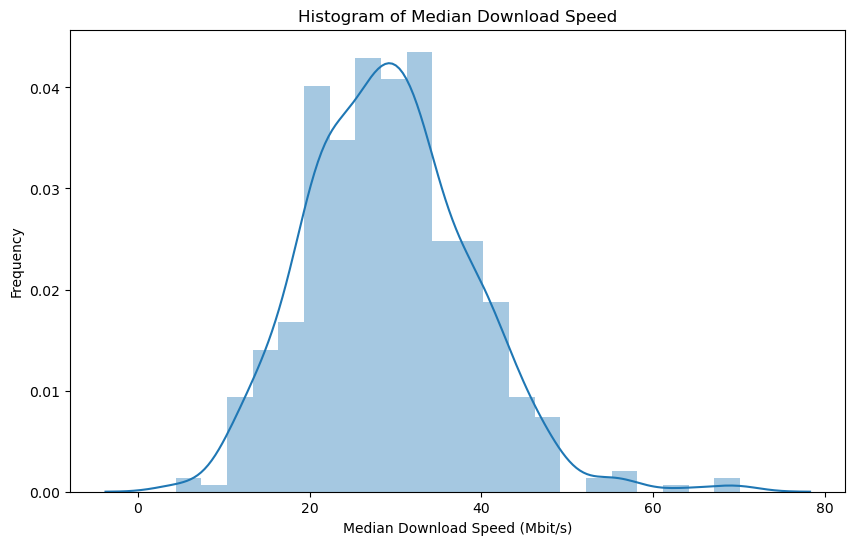

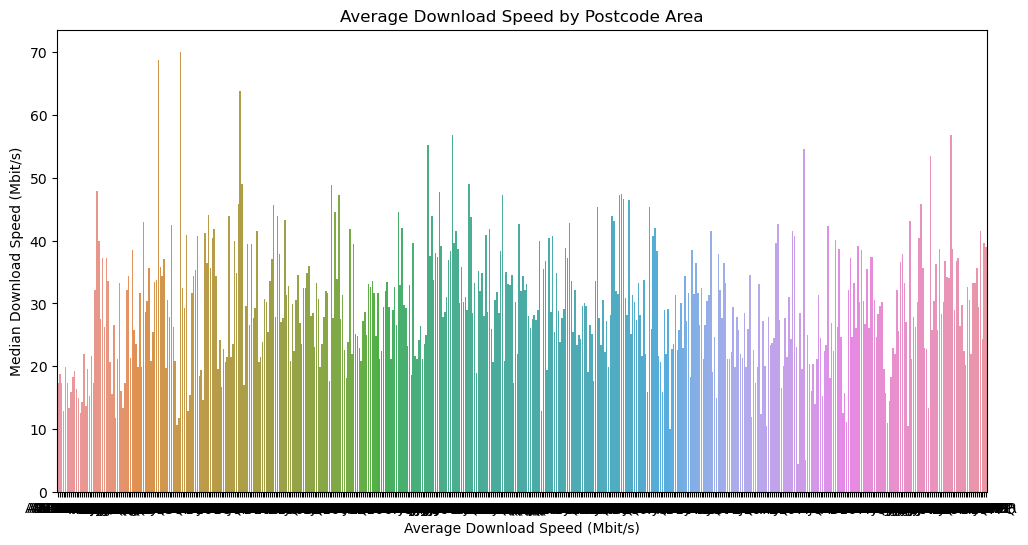

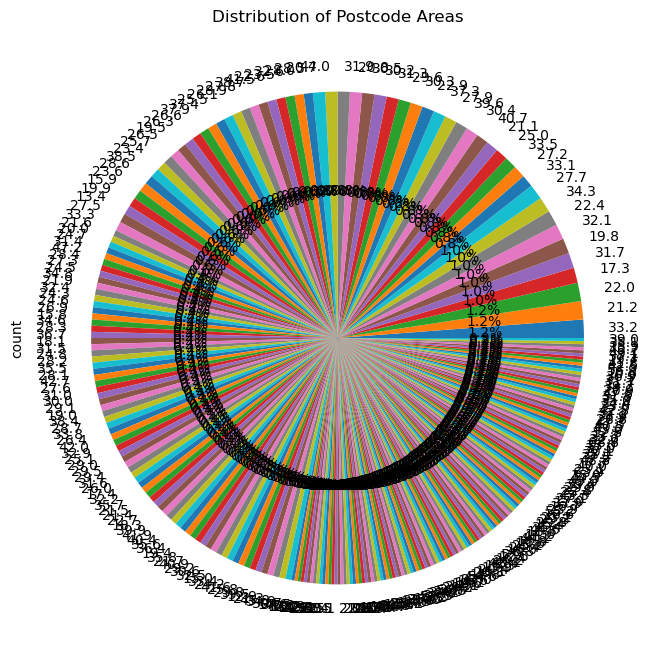

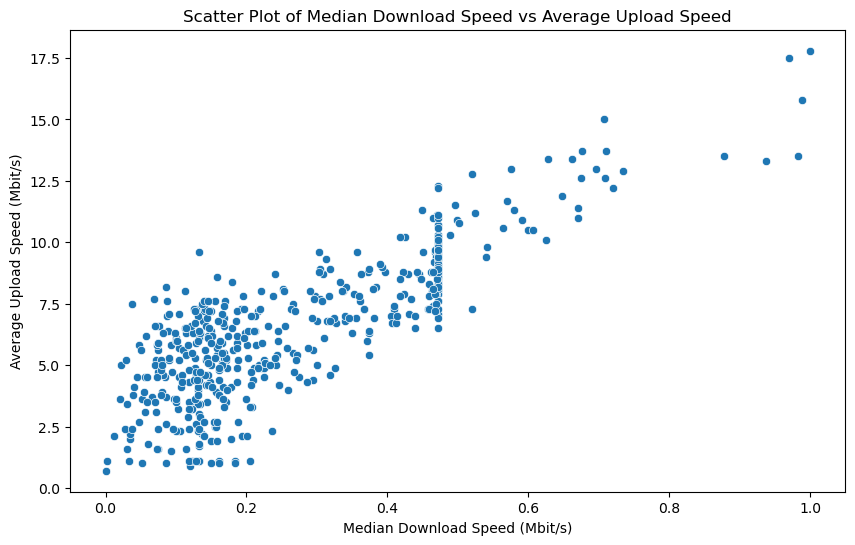

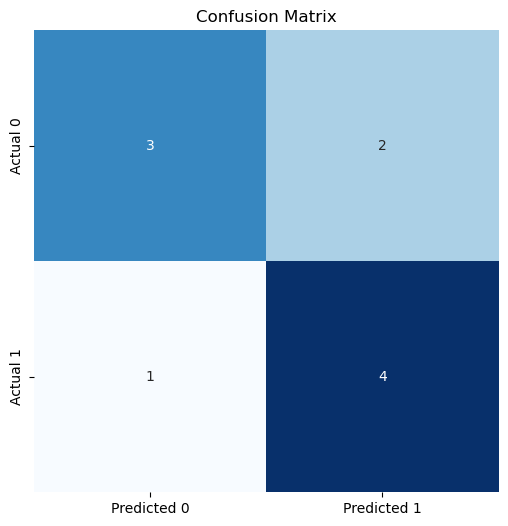

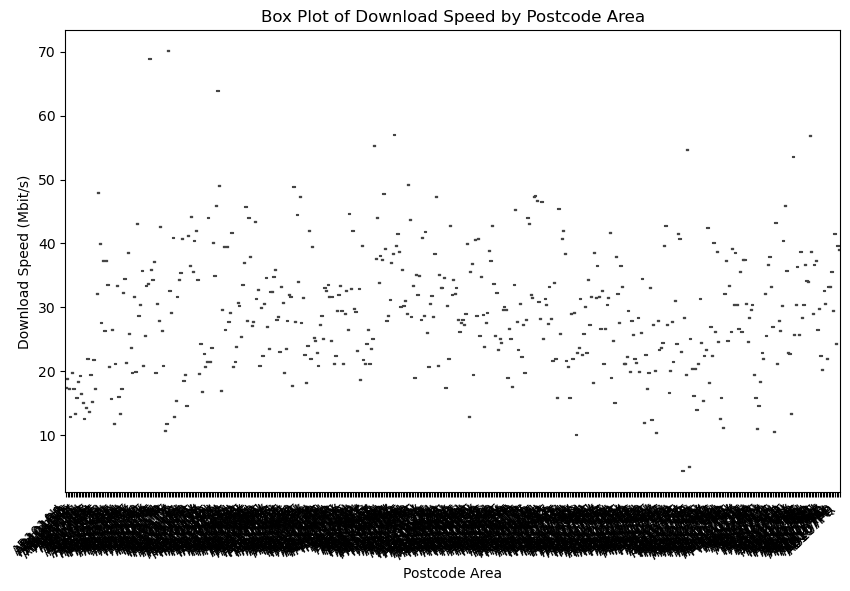

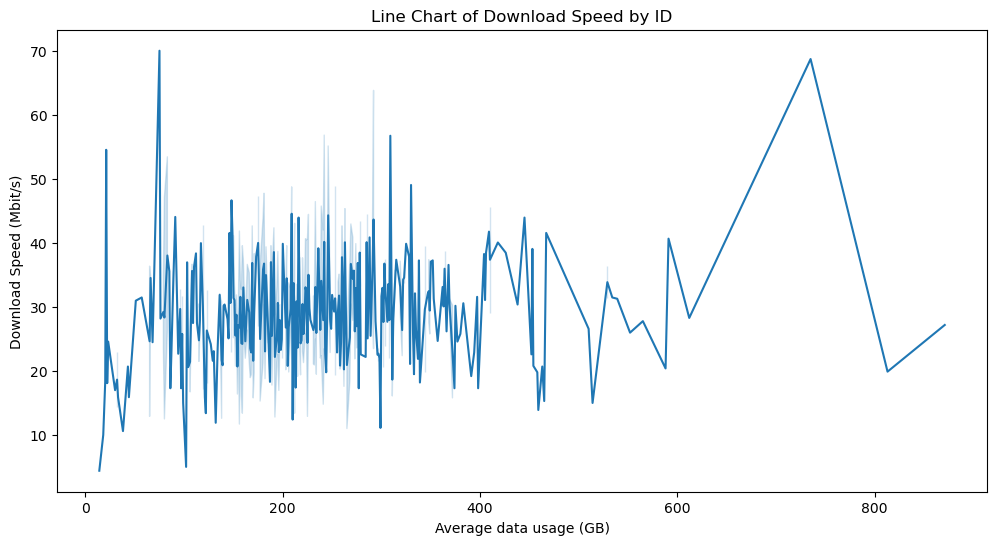

C:\Users\User\AppData\Local\Temp\ipykernel_16192\2748529953.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crime_df['Longitude'], kde=True)


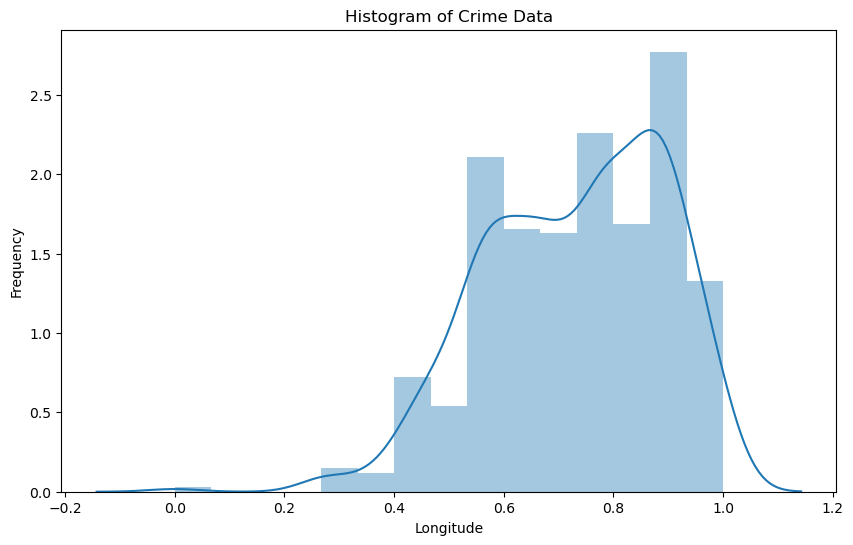

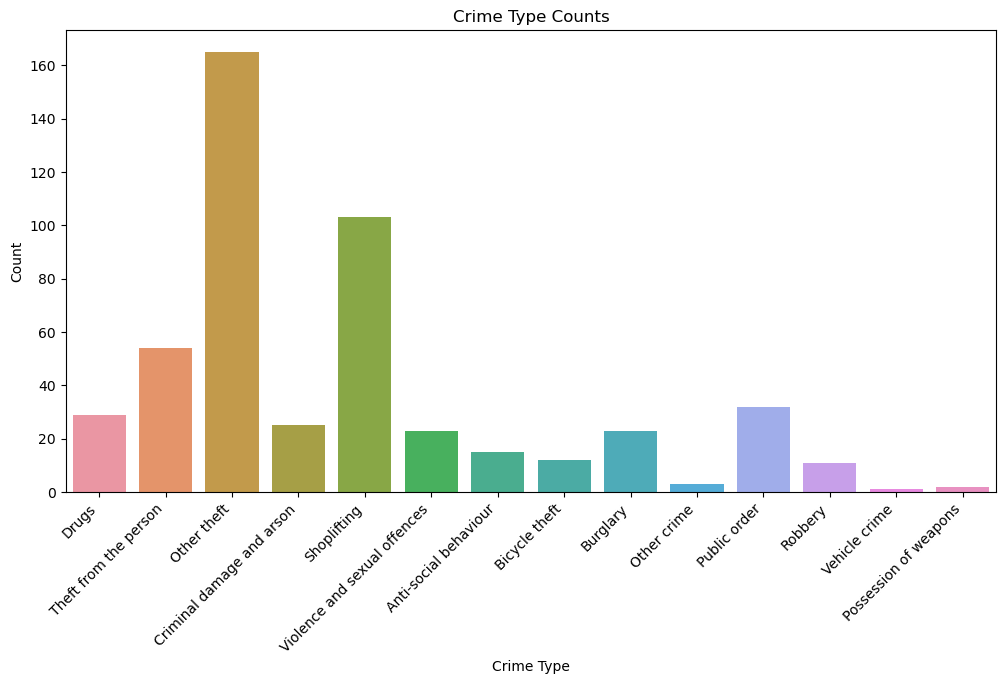

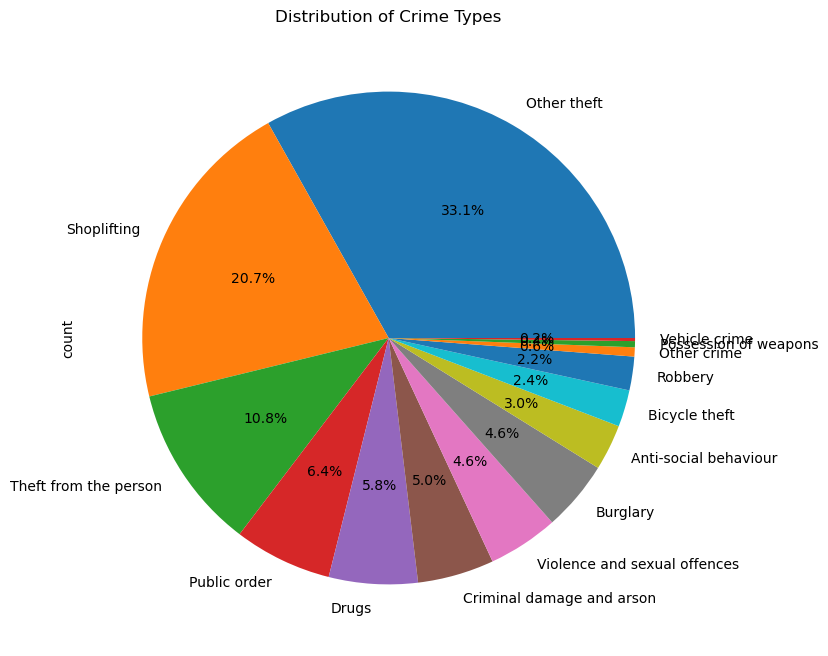

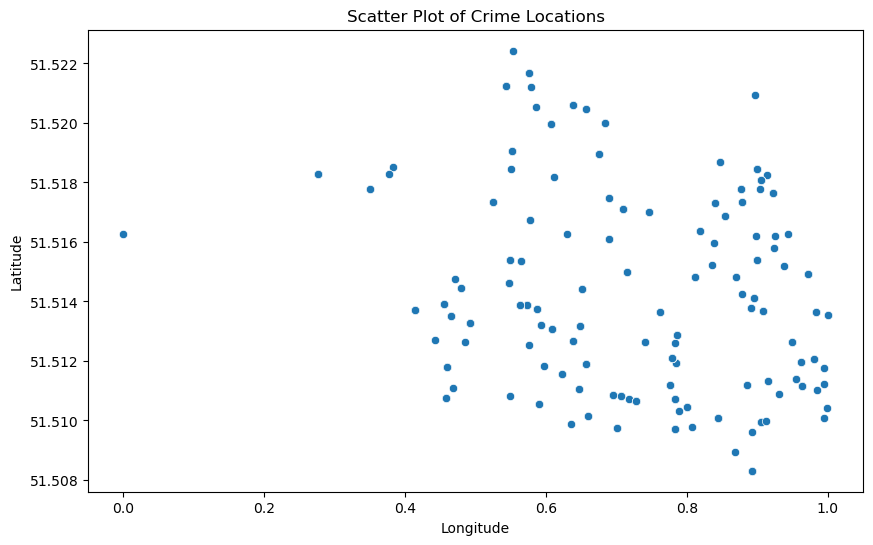

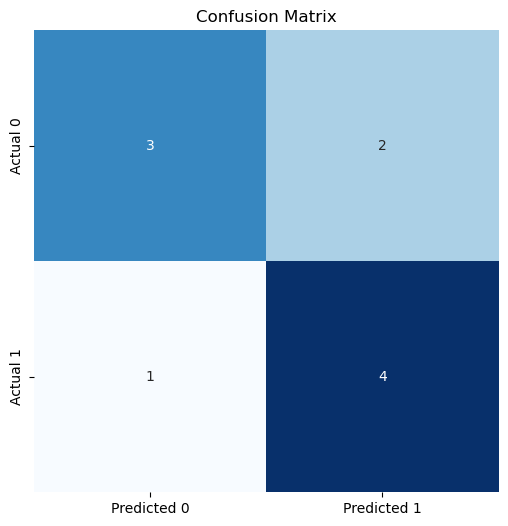

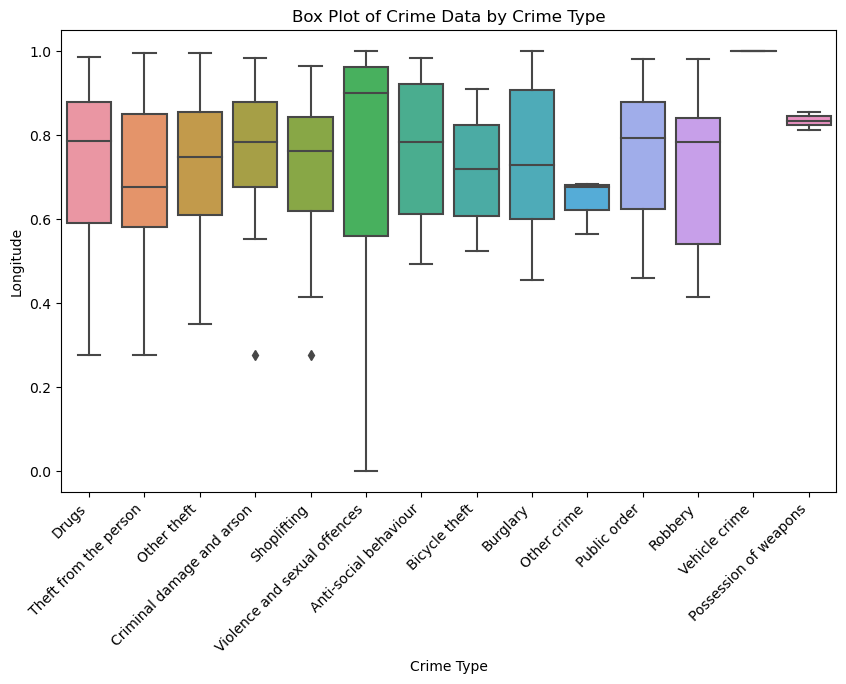

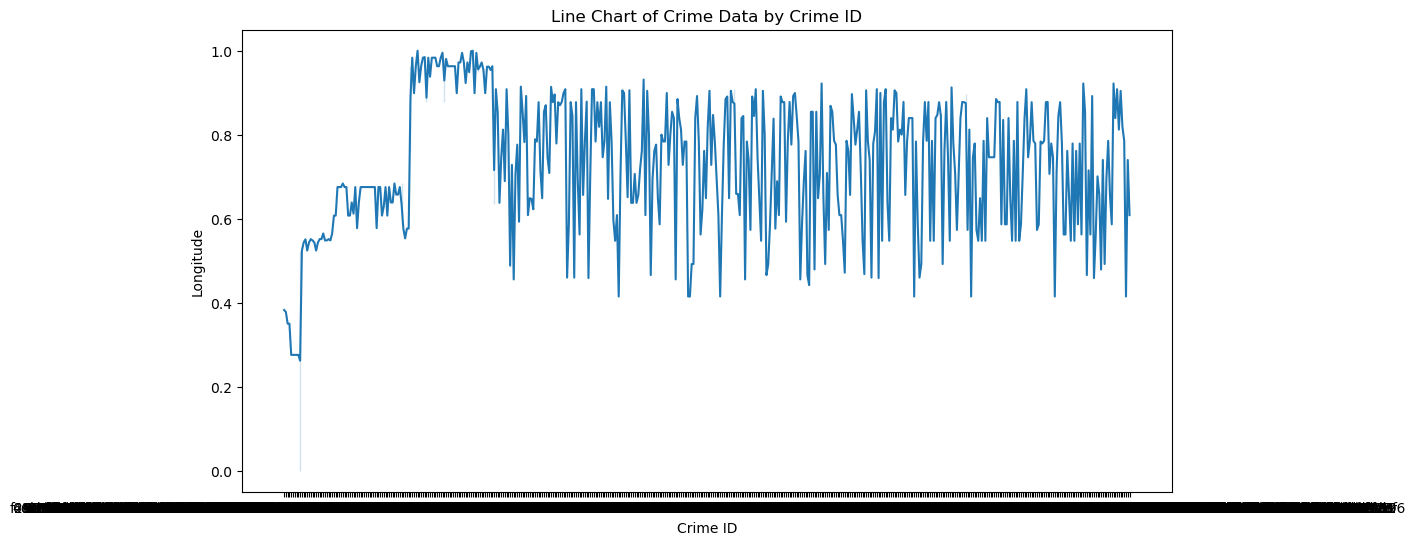

C:\Users\User\AppData\Local\Temp\ipykernel_16192\4294819623.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(education_df['ESTAB'], kde=True)


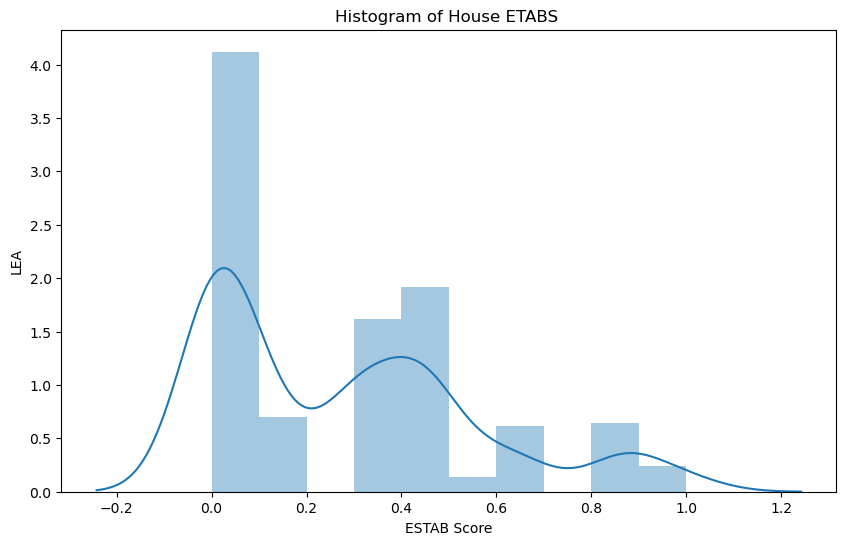

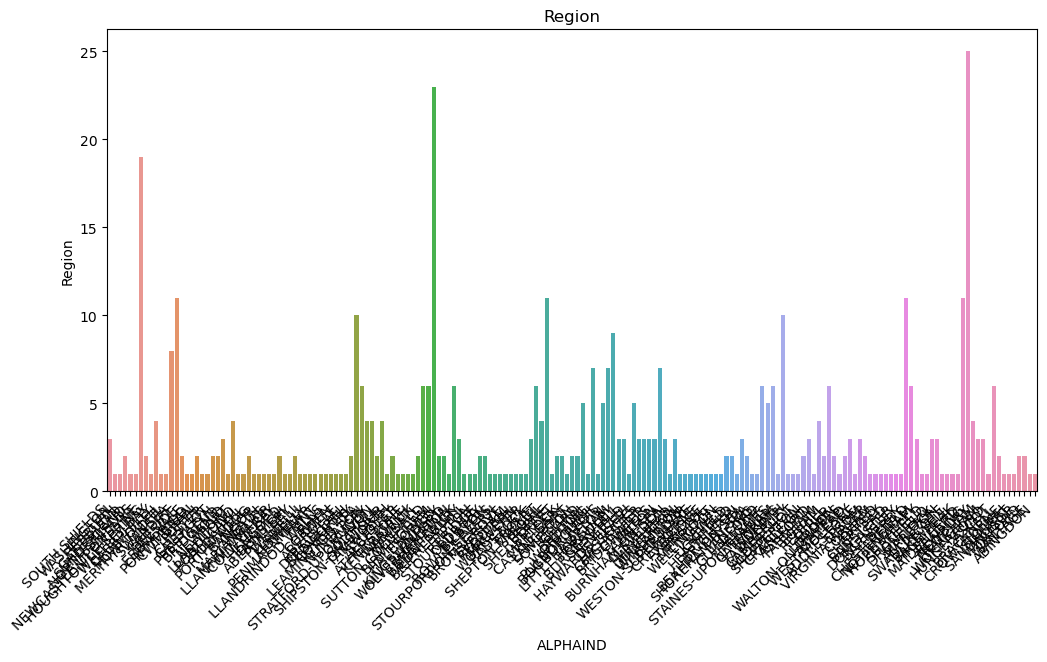

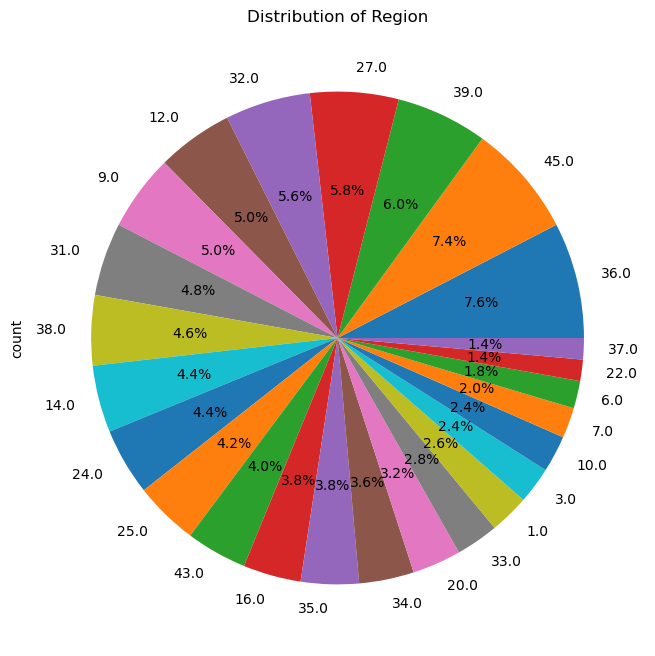

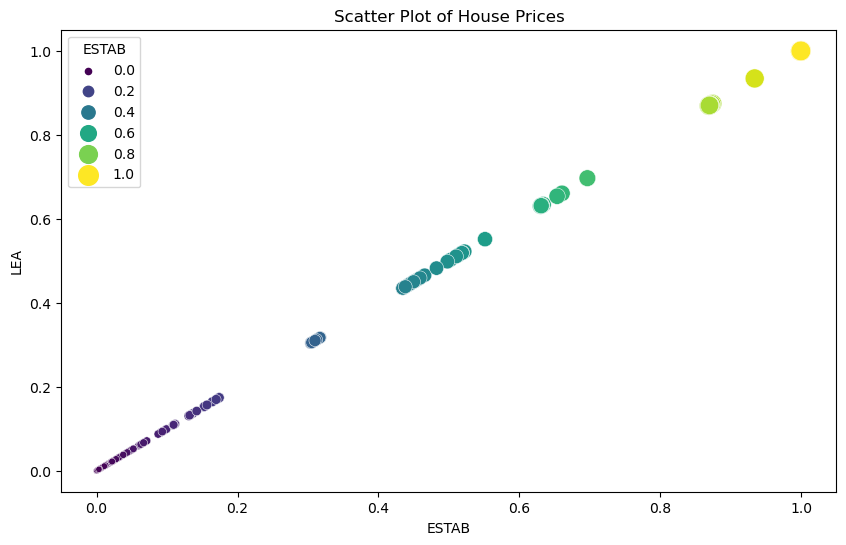

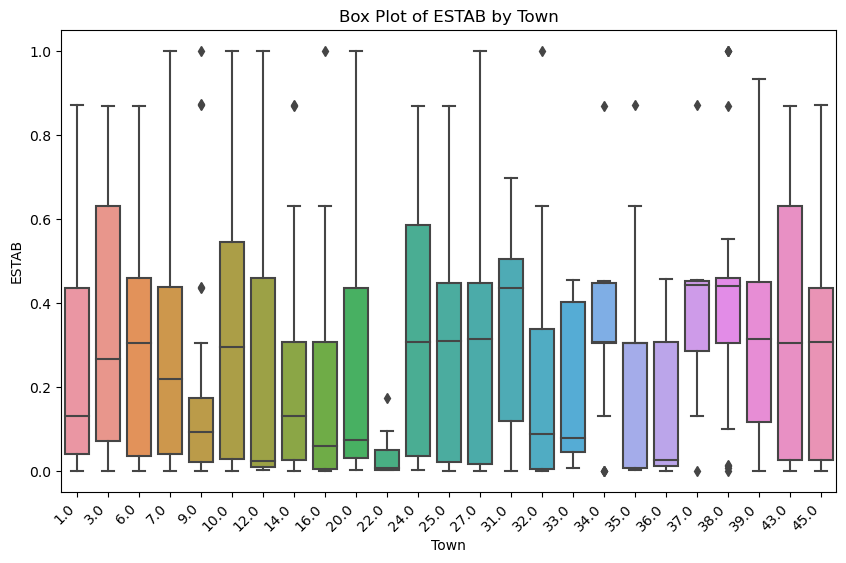

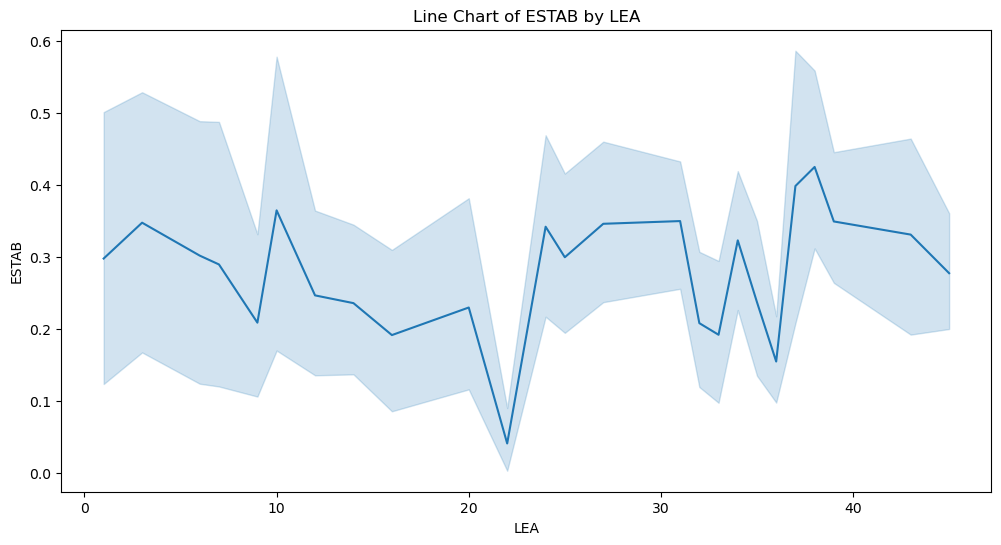

C:\Users\User\AppData\Local\Temp\ipykernel_16192\502640120.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['Price'], kde=True)


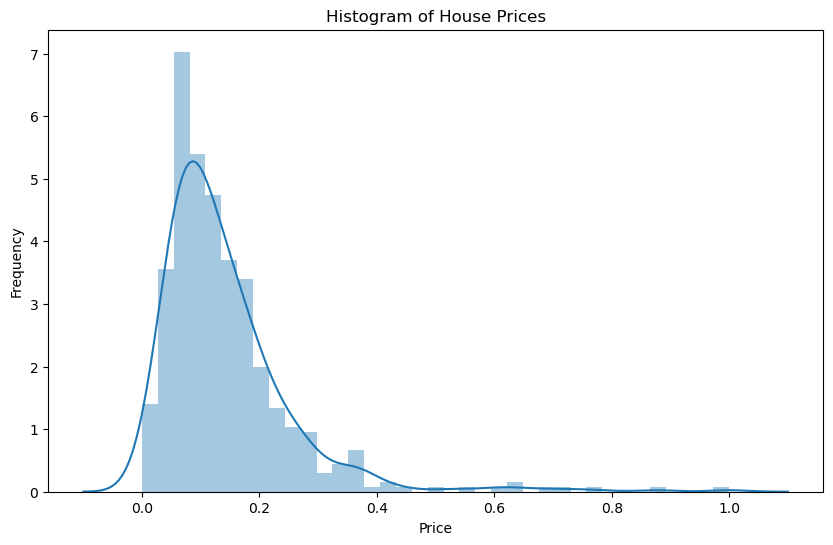

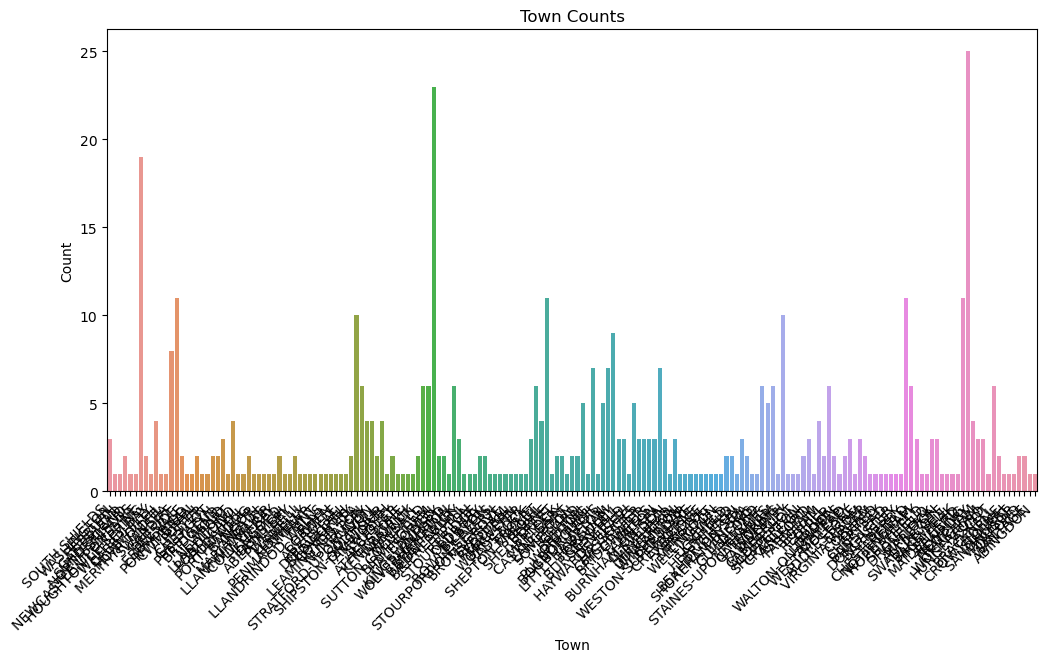

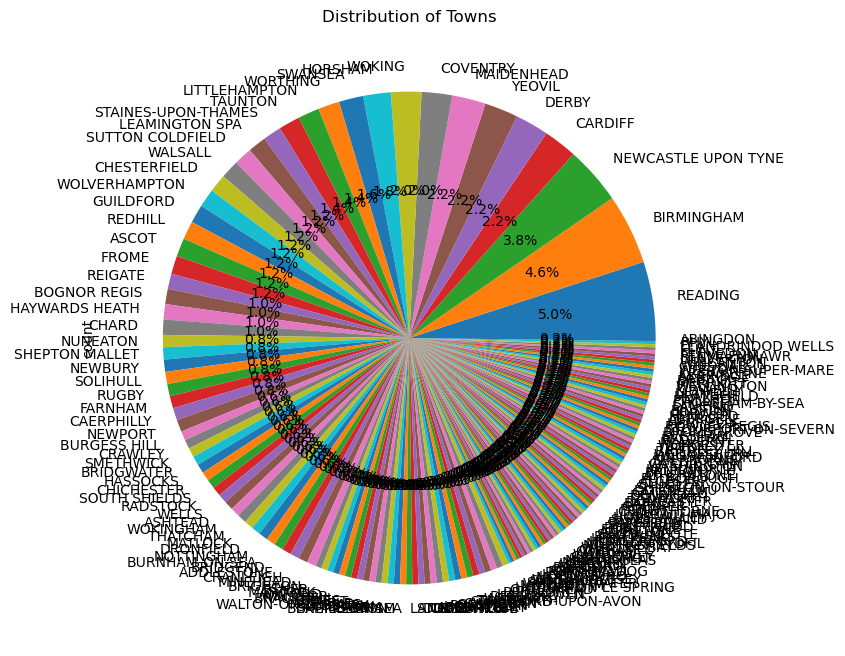

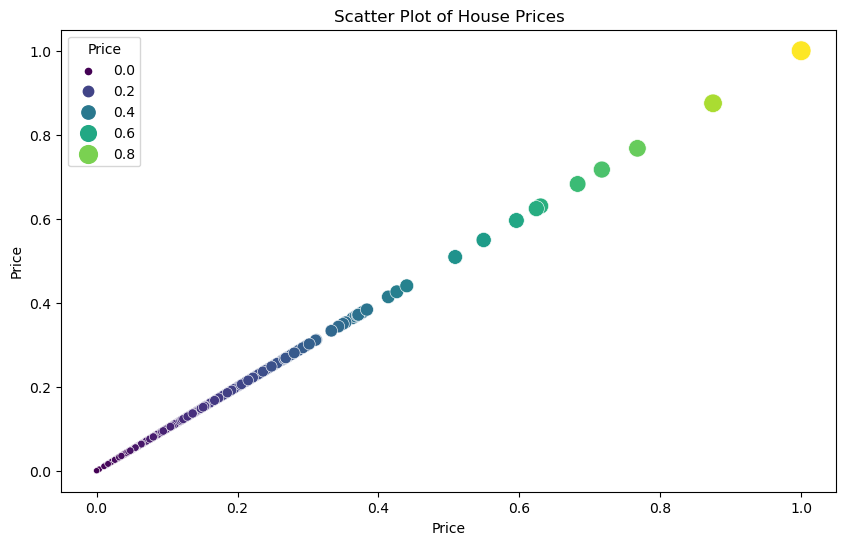

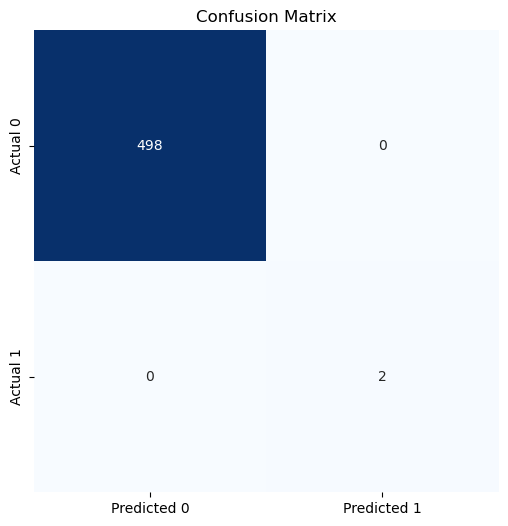

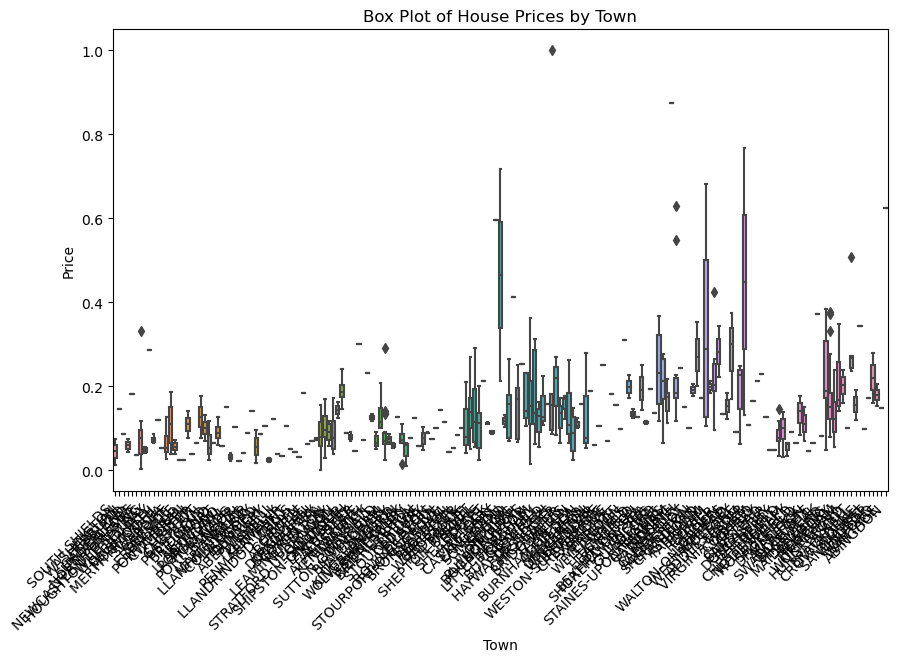

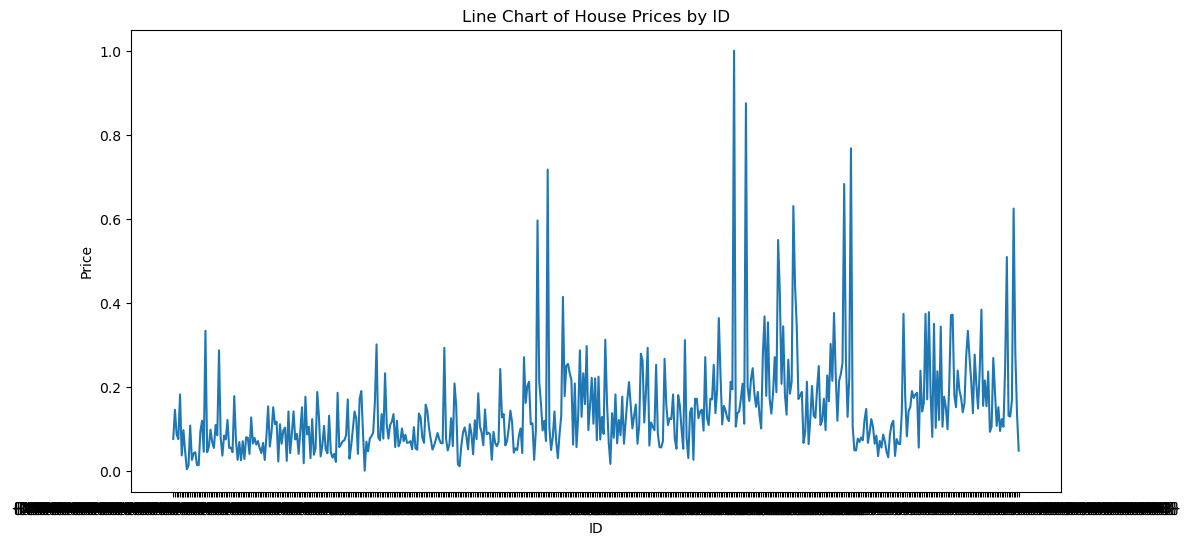

In [34]:
plot_broadband_figure()
plot_crime_figure()
plot_education_figure()
plot_house_prices()